In [3]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [73]:
data_2019<-read.csv('data/2019.csv',header = T)
colnames(data_2019)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-','합계')
data_2019$`날짜`<-as.Date(data_2019$`날짜`,format='%Y.%m.%d')
#data_2019$요일 <- weekdays(data_2019$날짜)
data_2019$`23-`<-data_2019$`23-24`+data_2019$`24-`
data_2019 <- data_2019[,-(24:26)]
head(data_2019)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,2341,3370,3226,3447,3277,2898,2590,3004,2234,1008
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2360,2743,2491,2572,2060,1991,1683,1217,764,605
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,868,946,958,1062,1146,1119,992,904,570,217
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,875,964,733,746,606,374,311,268,177,201
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1294,1843,1870,2129,2024,1806,1796,1780,1296,528
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1771,1654,1379,1420,1050,685,431,315,237,201


In [77]:
# 24이후 column 버린다
data_2020<-read.csv('data/2020.csv',header = T,encoding = 'UTF-8')
colnames(data_2020)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-')
data_2020$`날짜`<-as.Date(data_2020$`날짜`,format='%Y.%m.%d')
data_2020$`23-`<-data_2020$`23-24`+data_2020$`24-`
data_2020<-data_2020[,-(24:25)]
head(data_2020)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,⋯,2065,2972,3194,3342,3002,2857,2311,2523,1830,1012
2,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,⋯,2308,2286,2354,2261,1922,1696,1620,1181,768,503
3,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,⋯,763,873,1019,1234,1383,1271,1061,991,572,219
4,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,⋯,1021,885,783,849,602,435,293,273,174,175
5,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,⋯,1190,1636,1748,1890,1879,1827,1955,1800,1259,412
6,2020-01-01,1호선,152,종각,하차,71,191,295,511,855,⋯,1439,1610,1450,1352,1132,725,545,344,225,171


In [78]:
data_2021<-read.csv('data/2021.csv',header = T,encoding = 'UFF-8')
colnames(data)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
data_2021$`날짜`<-as.Date(data_2021$`날짜`,format='%Y.%m.%d')
head(data_2021)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,⋯,674,837,796,839,658,579,479,510,445,101
2,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,⋯,791,781,710,626,437,425,354,307,134,77
3,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,⋯,189,227,233,347,294,186,216,204,110,29
4,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,⋯,200,158,140,152,121,57,54,64,23,17
5,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,⋯,398,513,548,504,572,492,593,513,130,31
6,2021-01-01,1호선,152,종각,하차,34,116,178,304,391,⋯,480,432,478,415,274,117,75,72,29,19


In [90]:
data_all <- rbind(data_2019,data_2020,data_2021)
data_all$요일 <- weekdays(data_all$날짜)
head(data_all)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-,요일
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,3370,3226,3447,3277,2898,2590,3004,2234,1008,화요일
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2743,2491,2572,2060,1991,1683,1217,764,605,화요일
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,946,958,1062,1146,1119,992,904,570,217,화요일
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,964,733,746,606,374,311,268,177,201,화요일
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1843,1870,2129,2024,1806,1796,1780,1296,528,화요일
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1654,1379,1420,1050,685,431,315,237,201,화요일


In [137]:
write.csv(data_all,'data/data.csv',row.names=F)

In [8]:
data<- read.csv('data/data.csv',encoding = 'UTF-8')
colnames(data)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
data$합계 <-apply(data[,6:24],1,sum)
str(data)
data[data$호선=='1호선',]

'data.frame':	487334 obs. of  26 variables:
 $ 날짜  : chr  "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01" ...
 $ 호선  : chr  "1호선" "1호선" "1호선" "1호선" ...
 $ 역번호: int  150 150 151 151 152 152 153 153 154 154 ...
 $ 역명  : chr  "서울역" "서울역" "시청" "시청" ...
 $ 구분  : chr  "승차" "하차" "승차" "하차" ...
 $ -06   : int  348 222 87 48 669 68 227 38 48 25 ...
 $ 06-07 : int  321 821 98 237 318 179 198 180 80 102 ...
 $ 07-08 : int  348 808 143 323 217 293 148 261 67 140 ...
 $ 08-09 : int  741 961 206 571 203 546 205 424 138 296 ...
 $ 09-10 : int  940 1472 280 577 333 926 347 703 207 509 ...
 $ 10-11 : int  1401 1737 395 648 365 945 479 961 362 763 ...
 $ 11-12 : int  2166 1917 500 744 666 1334 933 1595 686 974 ...
 $ 12-13 : int  2844 2316 672 960 802 1566 1184 1977 991 1717 ...
 $ 13-14 : int  3055 2539 673 996 1103 1750 1228 2040 1364 1875 ...
 $ 14-15 : int  2341 2360 868 875 1294 1771 1636 2038 1537 1773 ...
 $ 15-16 : int  3370 2743 946 964 1843 1654 1604 1447 1449 1413 ...
 $ 16-17 : int  3226 

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-,요일,합계
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,3226,3447,3277,2898,2590,3004,2234,1008,화요일,39559
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2491,2572,2060,1991,1683,1217,764,605,화요일,31279
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,958,1062,1146,1119,992,904,570,217,화요일,11836
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,733,746,606,374,311,268,177,201,화요일,10359
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1870,2129,2024,1806,1796,1780,1296,528,화요일,21042
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1379,1420,1050,685,431,315,237,201,화요일,16750
7,2019-01-01,1호선,153,종로3가,승차,227,198,148,205,347,⋯,1948,1850,1529,1292,1149,1004,724,281,화요일,17966
8,2019-01-01,1호선,153,종로3가,하차,38,180,261,424,703,⋯,1209,884,722,487,262,249,209,230,화요일,15916
9,2019-01-01,1호선,154,종로5가,승차,48,80,67,138,207,⋯,1409,1553,1121,843,841,546,313,90,화요일,13645


In [3]:
corona <- read.csv('data/코로나동향.csv',header = T)

corona_new <- corona[,seq(1,53,2)]
corona_new$합계 <- apply(corona_new[,-1],1,sum)
corona_new$`자치구.기준일`<- as.Date(corona_new$`자치구.기준일`,format = '%Y.%m.%d')
corona_new <- corona_new[,c(1,28)]

corona_new <- corona_new[seq(519,1,-1),]
row.names(corona_new) <- c()
head(corona_new)

,자치구.기준일,합계
,<date>,<int>
1,2020-02-28,9
2,2020-02-29,12
3,2020-03-01,5
4,2020-03-02,5
5,2020-03-03,6
6,2020-03-04,0


In [45]:
## 2020년 11월 24일 처음으로 9시 이후 영업 금지가 실행됨

corona <- read.csv('data/코로나동향.csv',header = T)
colnames(corona)<- gsub('\\.',' ',colnames(corona))
corona_new <- corona[,seq(1,53,2)]
corona_new$합계 <- apply(corona_new[,-1],1,sum)
head(corona_new)


data<- read.csv('data/data.csv',encoding = 'UTF-8')
colnames(data)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
data$날짜 <- as.Date(data$날짜, format = '%Y-%m-%d')
data$합계 <-apply(data[,6:24],1,sum)
str(data)

,자치구 기준일,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,⋯,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가,기타 추가,합계
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2021.07.29.00,5,11,7,10,17,10,12,17,8,⋯,6,32,36,61,37,32,27,18,22,515
2,2021.07.28.00,6,9,14,9,25,12,21,16,12,⋯,19,27,35,55,19,39,34,27,32,573
3,2021.07.27.00,2,5,13,13,8,7,12,13,5,⋯,15,16,30,31,8,19,18,16,13,351
4,2021.07.26.00,4,7,7,14,12,8,6,11,12,⋯,11,22,15,30,13,24,13,20,14,341
5,2021.07.25.00,10,7,12,6,14,7,18,17,12,⋯,10,27,33,52,26,32,22,22,23,489
6,2021.07.24.00,4,9,15,16,18,8,25,8,17,⋯,13,13,30,40,21,32,34,18,24,465


'data.frame':	487334 obs. of  26 variables:
 $ 날짜  : Date, format: "2019-01-01" "2019-01-01" ...
 $ 호선  : chr  "1호선" "1호선" "1호선" "1호선" ...
 $ 역번호: int  150 150 151 151 152 152 153 153 154 154 ...
 $ 역명  : chr  "서울역" "서울역" "시청" "시청" ...
 $ 구분  : chr  "승차" "하차" "승차" "하차" ...
 $ -06   : int  348 222 87 48 669 68 227 38 48 25 ...
 $ 06-07 : int  321 821 98 237 318 179 198 180 80 102 ...
 $ 07-08 : int  348 808 143 323 217 293 148 261 67 140 ...
 $ 08-09 : int  741 961 206 571 203 546 205 424 138 296 ...
 $ 09-10 : int  940 1472 280 577 333 926 347 703 207 509 ...
 $ 10-11 : int  1401 1737 395 648 365 945 479 961 362 763 ...
 $ 11-12 : int  2166 1917 500 744 666 1334 933 1595 686 974 ...
 $ 12-13 : int  2844 2316 672 960 802 1566 1184 1977 991 1717 ...
 $ 13-14 : int  3055 2539 673 996 1103 1750 1228 2040 1364 1875 ...
 $ 14-15 : int  2341 2360 868 875 1294 1771 1636 2038 1537 1773 ...
 $ 15-16 : int  3370 2743 946 964 1843 1654 1604 1447 1449 1413 ...
 $ 16-17 : int  3226 2491 958 733 1870

In [79]:
data_after6<-data[,c('날짜','호선','역명','구분','18-19','19-20','20-21','21-22','22-23','23-')]
b<-data_after6[data_after6$날짜 %in% c(as.Date('2020-11-24')-30:1),]
c<-data_after6[data_after6$날짜 %in% c(as.Date('2019-11-24')-30:1),]
a<-data_after6[data_after6$날짜 %in% c(as.Date('2020-11-24')+1:30),]

wilcox.test(apply(b[,5:9],1,sum),apply(c[,5:9],1,sum),alternative = 'less')
wilcox.test(apply(a[,5:9],1,sum),apply(b[,5:9],1,sum),alternative = 'less')


	Wilcoxon rank sum test with continuity correction

data:  apply(b[, 5:9], 1, sum) and apply(c[, 5:9], 1, sum)
W = 112741414, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum test with continuity correction

data:  apply(a[, 5:9], 1, sum) and apply(b[, 5:9], 1, sum)
W = 118169909, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0


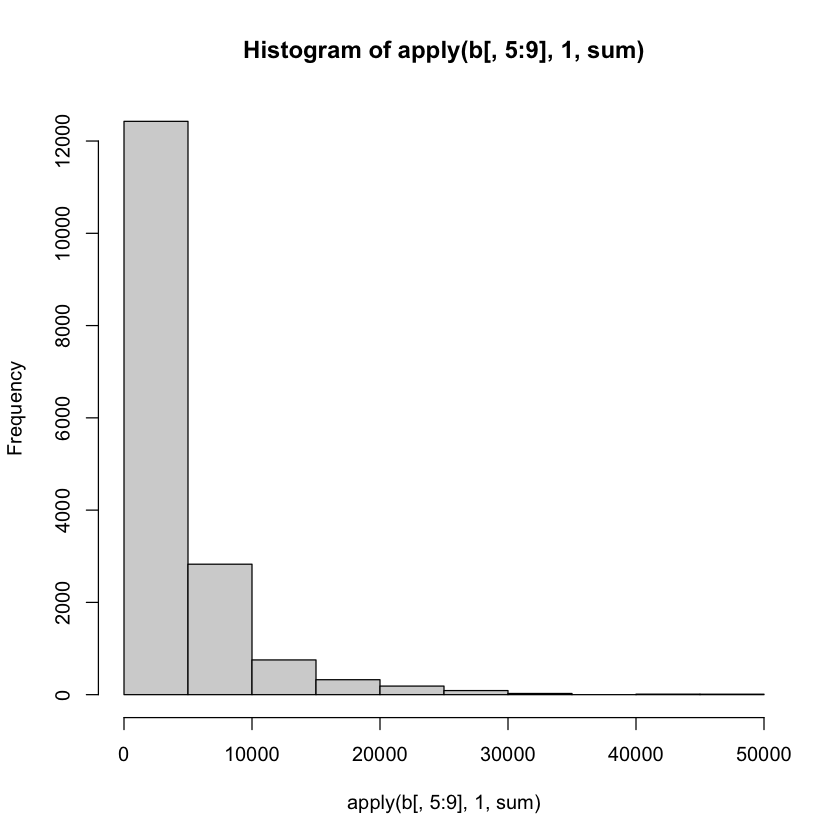


	Wilcoxon rank sum test with continuity correction

data:  apply(b[, 5:9], 1, sum) and apply(c[, 5:9], 1, sum)
W = 112741414, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0


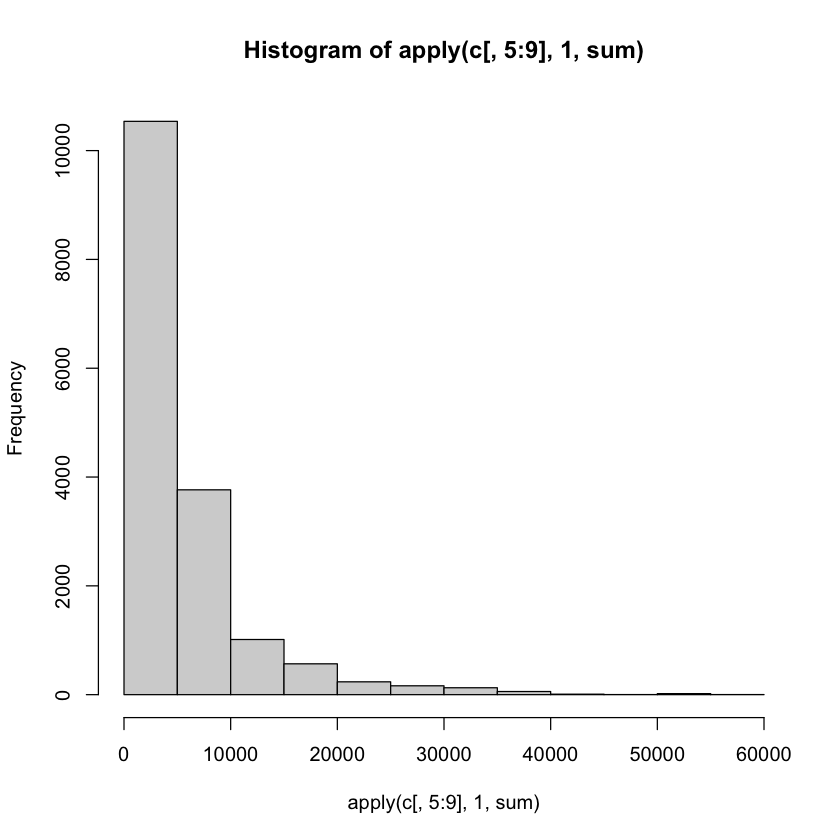

In [78]:
hist(apply(b[,5:9],1,sum))
hist(apply(c[,5:9],1,sum))
wilcox.test(apply(b[,5:9],1,sum),apply(c[,5:9],1,sum),alt='less')

In [82]:
# 코로나 발생 동향 지하철 유동인구 상관관계
length(corona_new$합계)


length(data$합계)

data$날짜>=as.Date('2020-02-28') & 


[1] 519

[1] 487334

ERROR: Error in cor(corona_new$합계, data$합계): 호환되지 않는 차원들입니다
